In [1]:
import sys
sys.path.append("../")
from helper import set_datetime_index, exp_time_data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

In [3]:
origin = read_excel("엑셀자료/세종시_인구추이2018_2023.xlsx")
#../는 상위폴더를 의미,'선생님자료' 폴더가 현재 자리 기준으로 
#2번 위에 있는 상위폴더에 있으므로 ../를2번 기재
origin.head()

시점   세대수합계    남자인구    여자인구   총인구합계  내국인남자인구  내국인여자인구   내국인합계  외국인남자인구  \
0  202306  160615  195711  195860  391571   192435   193691  386126     3276   
1  202305  160604  195651  195841  391492   192393   193657  386050     3258   
2  202304  160474  195574  195693  391267   192316   193509  385825     3258   
3  202303  160320  195467  195576  391043   192212   193397  385609     3255   
4  202302  160012  195327  195307  390634   192110   193175  385285     3217   

   외국인여자인구  외국인합계  인구밀도   면적  인구증가율  세대당인구  65세이상 고령자인구  
0     2169   5445   841  465    NaN      2          NaN  
1     2184   5442   841  465    NaN      2      41082.0  
2     2184   5442   841  465    NaN      2      41082.0  
3     2179   5434   841  465    NaN      2      40950.0  
4     2132   5349   840  465    NaN      2      40644.0

In [3]:
df=origin.copy()
df1=df.sort_values('시점',ascending=True)
df1['시점']=to_datetime(df1['시점'],format='%Y%m')
df1

시점   세대수합계    남자인구    여자인구   총인구합계  내국인남자인구  내국인여자인구   내국인합계  \
65 2018-01-01  110573  143691  143594  287285   141253   141945  283198   
64 2018-02-01  112343  146037  146171  292208   143601   144478  288079   
63 2018-03-01  113853  147760  147697  295457   145235   145947  291182   
62 2018-04-01  115640  149729  149613  299342   147180   147861  295041   
61 2018-05-01  116639  151037  150895  301932   148481   149123  297604   
..        ...     ...     ...     ...     ...      ...      ...     ...   
4  2023-02-01  160012  195327  195307  390634   192110   193175  385285   
3  2023-03-01  160320  195467  195576  391043   192212   193397  385609   
2  2023-04-01  160474  195574  195693  391267   192316   193509  385825   
1  2023-05-01  160604  195651  195841  391492   192393   193657  386050   
0  2023-06-01  160615  195711  195860  391571   192435   193691  386126   

    외국인남자인구  외국인여자인구  외국인합계  인구밀도   면적  인구증가율  세대당인구  65세이상 고령자인구  
65     2438     1649   4087   618  465    1.0      3      27052.0  
64     2436     1693   4129   629  465    2.0      3      27297.0  
63     2525     1750   4275   636  465    4.0      3      27541.0  
62     2549     1752   4301   644  465    5.0      3      27830.0  
61     2556     1772   4328   650  465    6.0      3      28019.0  
..      ...      ...    ...   ...  ...    ...    ...          ...  
4      3217     2132   5349   840  465    NaN      2      40644.0  
3      3255     2179   5434   841  465    NaN      2      40950.0  
2      3258     2184   5442   841  465    NaN      2      41082.0  
1      3258     2184   5442   841  465    NaN      2      41082.0  
0      3276     2169   5445   841  465    NaN      2          NaN  

[66 rows x 16 columns]

In [4]:
df1.dtypes

시점             datetime64[ns]
세대수합계                   int64
남자인구                    int64
여자인구                    int64
총인구합계                   int64
내국인남자인구                 int64
내국인여자인구                 int64
내국인합계                   int64
외국인남자인구                 int64
외국인여자인구                 int64
외국인합계                   int64
인구밀도                    int64
면적                      int64
인구증가율                 float64
세대당인구                   int64
65세이상 고령자인구           float64
dtype: object

In [5]:
df1.set_index('시점',inplace=True)
df1

세대수합계    남자인구    여자인구   총인구합계  내국인남자인구  내국인여자인구   내국인합계  외국인남자인구  \
시점                                                                              
2018-01-01  110573  143691  143594  287285   141253   141945  283198     2438   
2018-02-01  112343  146037  146171  292208   143601   144478  288079     2436   
2018-03-01  113853  147760  147697  295457   145235   145947  291182     2525   
2018-04-01  115640  149729  149613  299342   147180   147861  295041     2549   
2018-05-01  116639  151037  150895  301932   148481   149123  297604     2556   
...            ...     ...     ...     ...      ...      ...     ...      ...   
2023-02-01  160012  195327  195307  390634   192110   193175  385285     3217   
2023-03-01  160320  195467  195576  391043   192212   193397  385609     3255   
2023-04-01  160474  195574  195693  391267   192316   193509  385825     3258   
2023-05-01  160604  195651  195841  391492   192393   193657  386050     3258   
2023-06-01  160615  195711  195860  391571   192435   193691  386126     3276   

            외국인여자인구  외국인합계  인구밀도   면적  인구증가율  세대당인구  65세이상 고령자인구  
시점                                                                
2018-01-01     1649   4087   618  465    1.0      3      27052.0  
2018-02-01     1693   4129   629  465    2.0      3      27297.0  
2018-03-01     1750   4275   636  465    4.0      3      27541.0  
2018-04-01     1752   4301   644  465    5.0      3      27830.0  
2018-05-01     1772   4328   650  465    6.0      3      28019.0  
...             ...    ...   ...  ...    ...    ...          ...  
2023-02-01     2132   5349   840  465    NaN      2      40644.0  
2023-03-01     2179   5434   841  465    NaN      2      40950.0  
2023-04-01     2184   5442   841  465    NaN      2      41082.0  
2023-05-01     2184   5442   841  465    NaN      2      41082.0  
2023-06-01     2169   5445   841  465    NaN      2          NaN  

[66 rows x 15 columns]

In [9]:
df2=df1.filter(['세대수합계','총인구합계','외국인합계','인구밀도'],axis=1)
df2

세대수합계   총인구합계  외국인합계  인구밀도
시점                                     
2018-01-01  110573  287285   4087   618
2018-02-01  112343  292208   4129   629
2018-03-01  113853  295457   4275   636
2018-04-01  115640  299342   4301   644
2018-05-01  116639  301932   4328   650
...            ...     ...    ...   ...
2023-02-01  160012  390634   5349   840
2023-03-01  160320  391043   5434   841
2023-04-01  160474  391267   5442   841
2023-05-01  160604  391492   5442   841
2023-06-01  160615  391571   5445   841

[66 rows x 4 columns]

### 총인구 시계열 데이터 분석

In [10]:
# model_name = 'additive'         # 가법 모델
model_name = 'multiplicative'   # 승법 모델

sd = seasonal_decompose(df1['총인구합계'], model=model_name)

# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    '관측값': sd.observed,
    '트렌드': sd.trend,
    '계절성': sd.seasonal,
    '잔차': sd.resid
}, index=df1.index)

sd_df.head()

관측값  트렌드       계절성  잔차
시점                                     
2018-01-01  287285.0  NaN  1.002646 NaN
2018-02-01  292208.0  NaN  1.004392 NaN
2018-03-01  295457.0  NaN  1.003738 NaN
2018-04-01  299342.0  NaN  0.999005 NaN
2018-05-01  301932.0  NaN  1.000225 NaN

결측치 수: 0


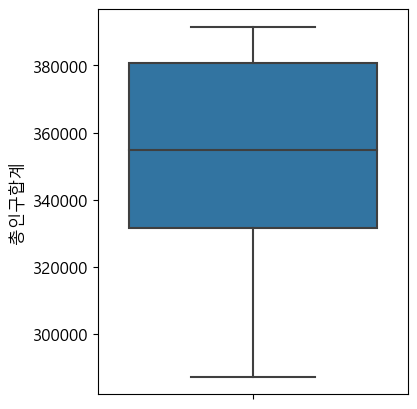

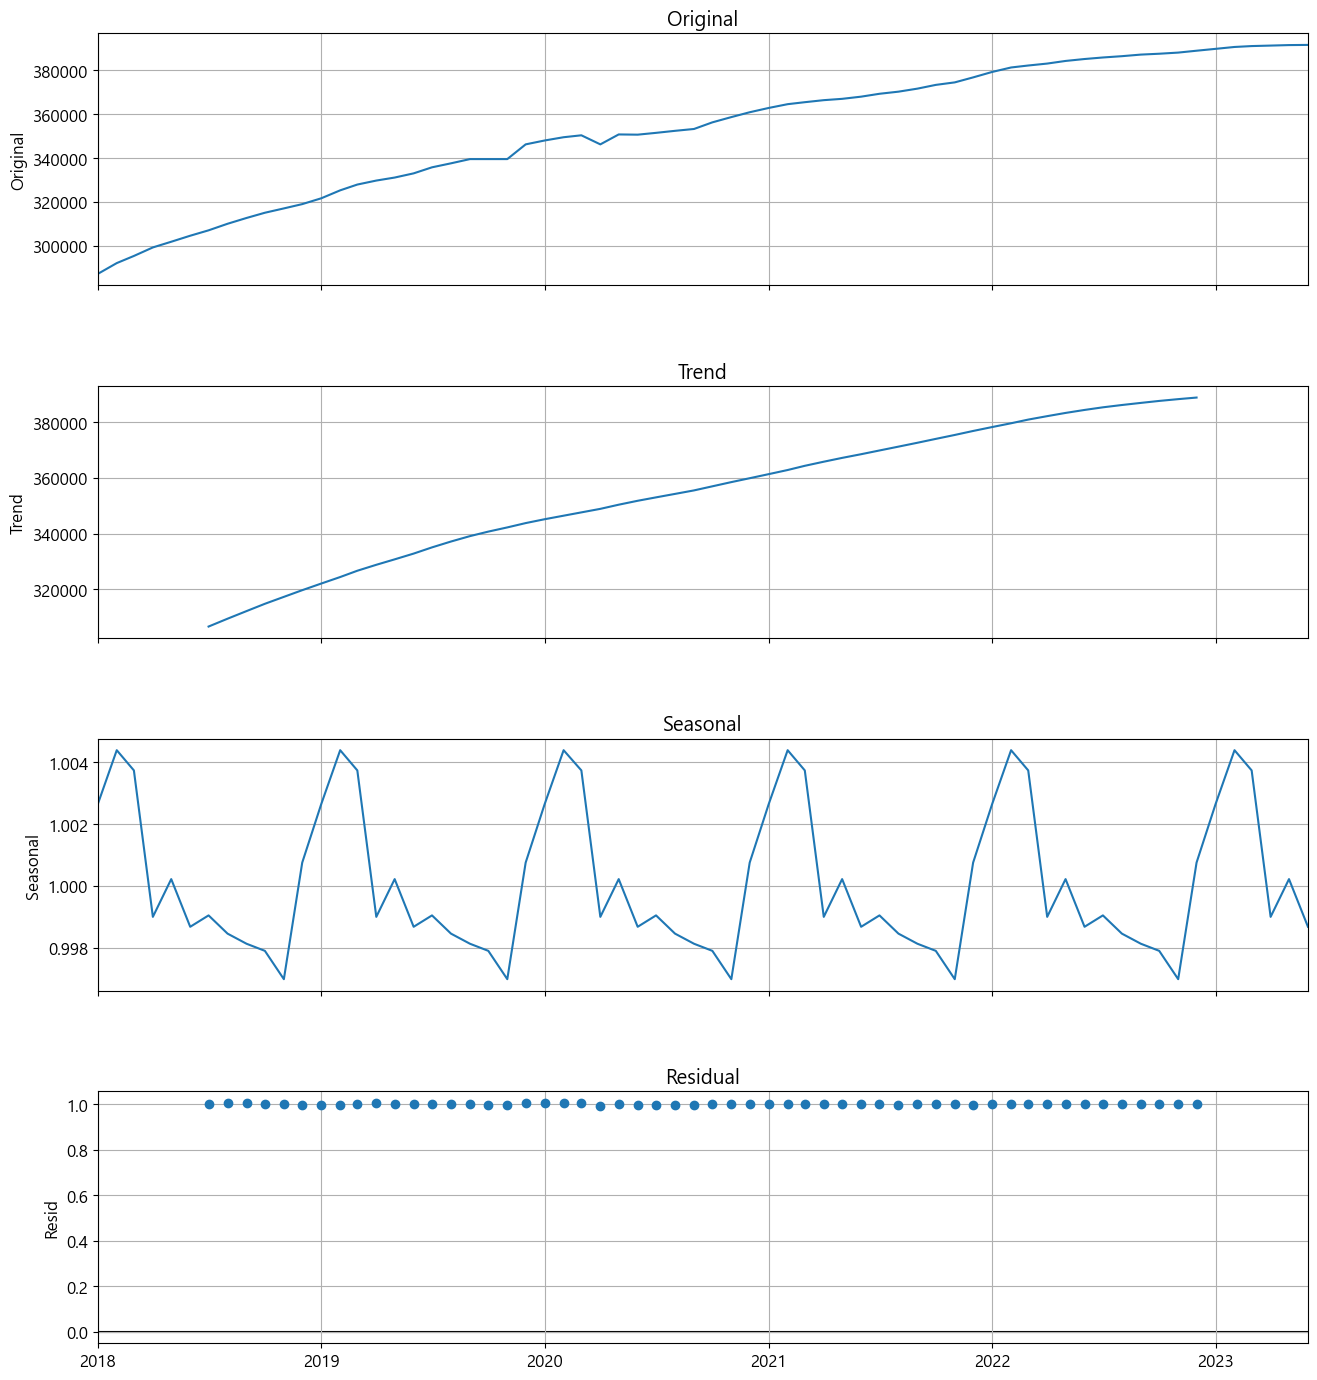

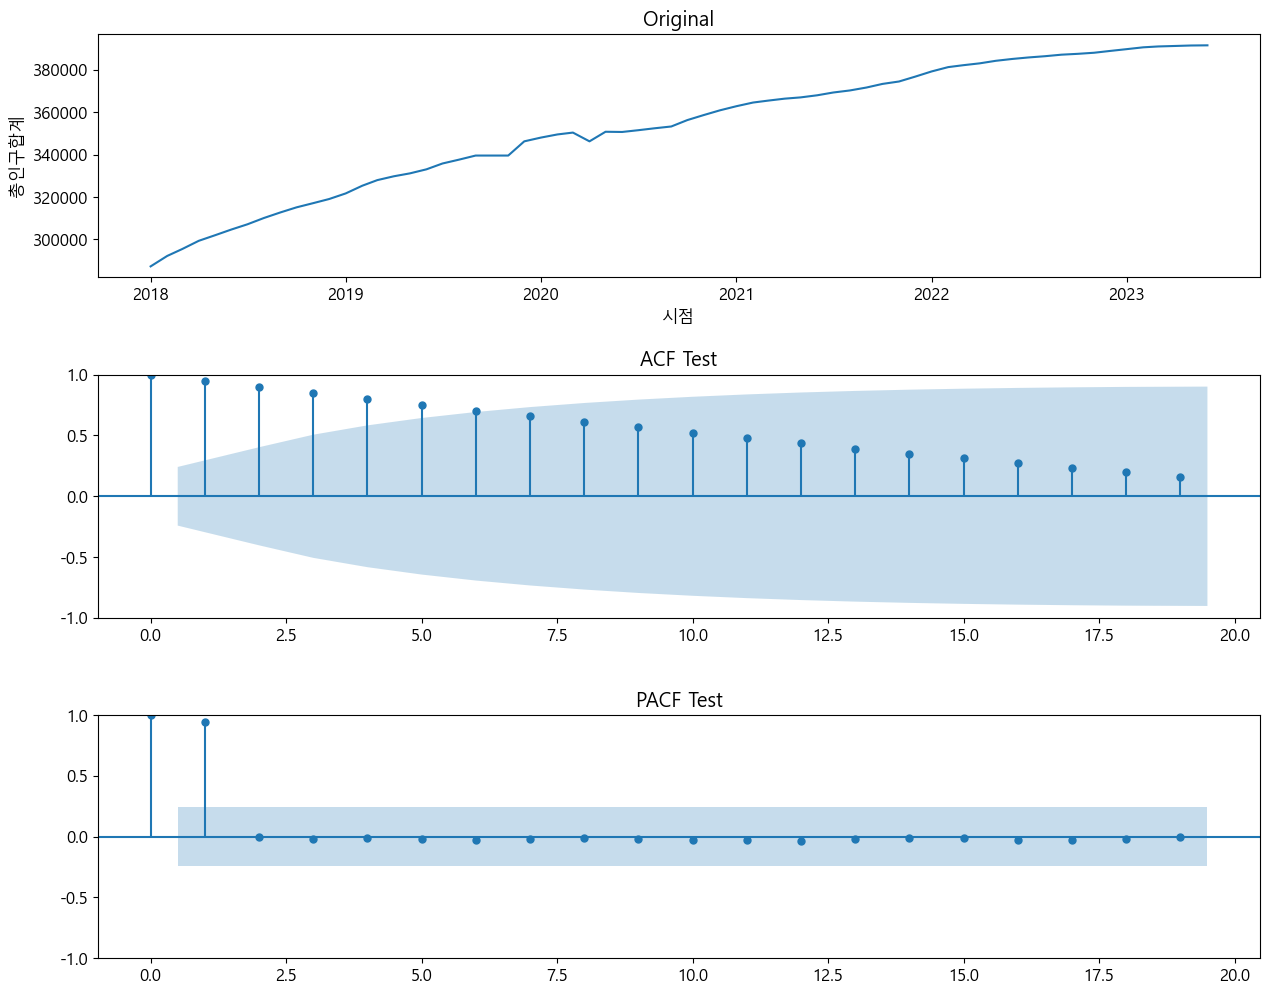

=========== 원본 데이터 ===========
+------------------------------------+------------+
| ADF Test                           |            |
|------------------------------------+------------|
| 검정통계량(ADF Statistic)          |   -3.47448 |
| 유의수준(p-value)                  | 0.00866716 |
| 최적차수(num of lags)              |          8 |
| 관측치 개수(num of observations)   |         57 |
| 기각값(Critical Values) 1%         |   -3.55067 |
| 기각값(Critical Values) 5%         |   -2.91377 |
| 기각값(Critical Values) 10%        |   -2.59462 |
| 데이터 정상성 여부(0=Flase,1=True) |          1 |
+------------------------------------+------------+


In [11]:
exp_time_data(data=df1,yname="총인구합계",sd_model='m',max_diff=5)

In [12]:
#auto arima 모델 이용하여 시계열 분석 진행

my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 0    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 12    # 계절성 주기 (분석가가 판단) #1년에 4분기(12/4)로 진행해서 수치는 3으로,(데이터 자체도 3개월주기)

model = auto_arima(
    y=df1['총인구합계'],  # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1550.530, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1241.104, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1875.938, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1244.213, Time=0.04 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1552.443, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,0,0)(1,0,0)[12] intercept
Total fit time: 0.631 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   66
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -616.552
Date:                            Mon, 18 Sep 2023   AIC                           1241.104
Time:                                    10:33:35   BIC                           1249.862
Sample:                    

In [13]:
fv = model.fittedvalues()
fv.head()

시점
2018-01-01    349272.975457
2018-02-01    289185.897265
2018-03-01    293856.204167
2018-04-01    296925.675879
2018-05-01    300599.136451
dtype: float64

In [14]:
fc = model.predict(n_periods=12)
fc.head()

2023-07-01    390370.011806
2023-08-01    389198.896147
2023-09-01    388121.298821
2023-10-01    387007.832914
2023-11-01    385980.903479
Freq: MS, dtype: float64

In [17]:
last1 = df1.index.min()
last = df1.index.max()
xmin = last1
xmax = last+timedelta(days=365+123)
ymax = df1['총인구합계'][xmin:xmax].max()
xmin, xmax, ymax

(Timestamp('2018-01-01 00:00:00'), Timestamp('2024-10-01 00:00:00'), 391571)

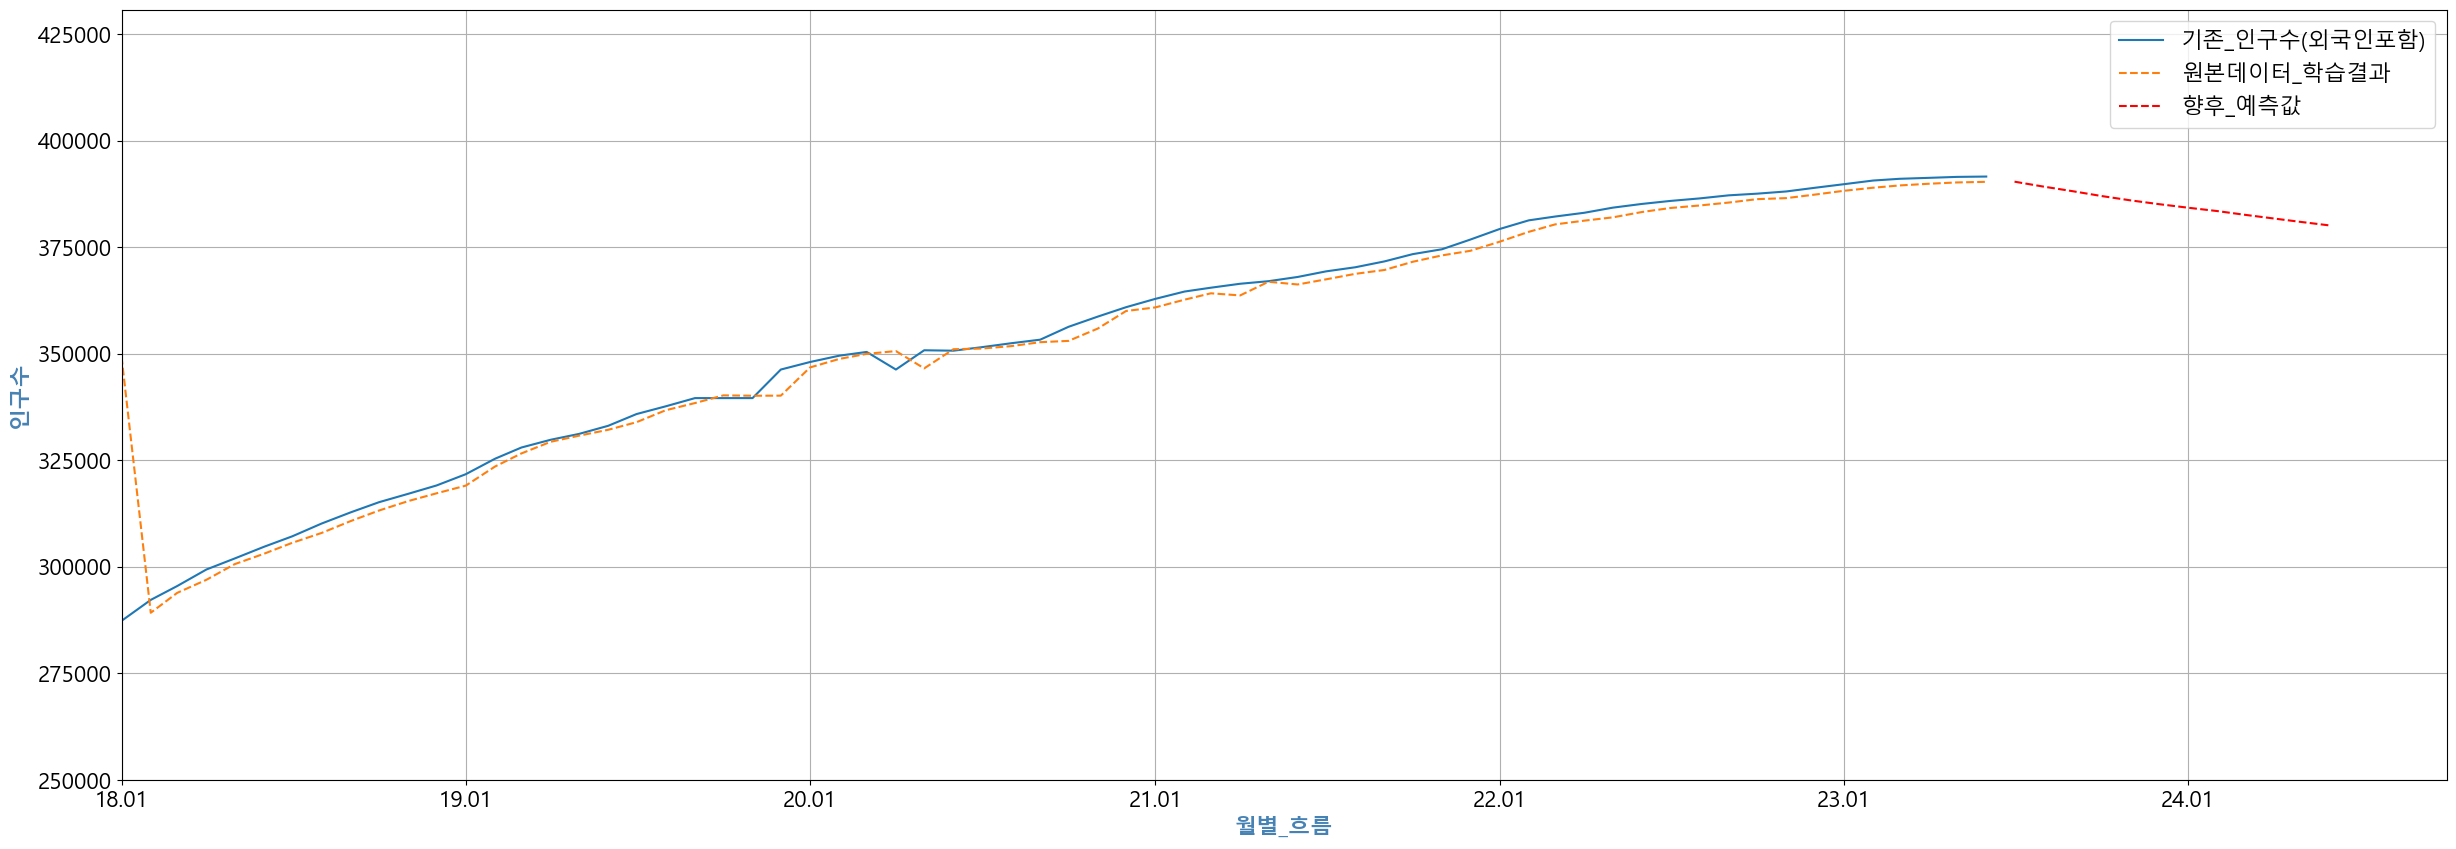

In [25]:
plt.rcParams["font.size"] = 16

plt.figure(figsize=(30,10))

# 원본 데이터
sb.lineplot(data=df1, x=df1.index, y='총인구합계', label='기존_인구수(외국인포함)')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='원본데이터_학습결과', linestyle='--')

# 향후 2년간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='향후_예측값', linestyle='--', color='red')

plt.xlabel('월별_흐름',color='steelblue',fontweight='bold')
plt.ylabel('인구수',color='steelblue',fontweight='bold')
plt.legend()

plt.xlim([xmin, xmax])
plt.ylim([250000, ymax*1.1])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

시계열 그래프로 예측 결과 데이터의 처음 시작 일자인 18년도부터 22년까지는 지속적인 인구 성장이 확인되었다.

그러나 그 이후부터 인구 성장세가 소폭으로 올라가고 23년도부터 인구 성장이 거의 멈춘것으로 보여진다

향후 예측으로는 특별한 이슈가 없는 이상 인구 감소세로 들어서는 것으로 보여진다.

다만 해당 예측값보다는 보수적으로 판단시 소폭으로 감소할것으로 보여진다.

<관련기사>

https://n.news.naver.com/mnews/article/014/0005064766?sid=101

https://www.sjsori.com/news/articleView.html?idxno=65111

https://www.hani.co.kr/arti/area/chungcheong/1103229.html
